In [2]:

import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def img_norm(img):
    new_img = img.copy().astype('float64')
    new_img -= img.min()
    max_val = new_img.max()
    new_img = new_img / (max_val) * 255
    return np.clip(new_img.round(), 0, 255).astype('uint8')

In [4]:
def img_trans_reverse(img):
    return 255 - img

In [5]:
def rgbtransgray(img):
    height, width, channels = img.shape
    img_gray = np.zeros((height, width))
    img_gray = np.round(img[:, :, 0] / 3 + img[:, :, 1] / 3 + img[:, :, 2] / 3)
    return np.clip(img_gray, 0, 255).astype('uint8')

In [14]:
def img_trans_log(img, c):
    height, width, channels = img.shape
    img_log = np.zeros((height, width))
    img_log = c * np.log10(1 + img)
    return np.clip(np.round(img_log), 0, 255).astype('uint8')

In [4]:
def img_trans_gamma(img, c, gamma):
    height, width, channels = img.shape
    gamma_img = np.zeros((height, width, channels))
    gamma_img = c * (img ** gamma)
    min_val = gamma_img.min()
    max_val = gamma_img.max()
    gamma_img = (gamma_img - min_val) / (max_val - min_val) * 255
    return np.clip(np.round(gamma_img), 0, 255).astype('uint8')

In [18]:
img = cv2.imread('../img/Fig0304(a)(breast_digital_Xray).tif')
img1 = cv2.imread('../img/Fig0305(a)(DFT_no_log).tif')
grey_img = rgbtransgray(img)
reversed_img = img_trans_reverse(grey_img)
log_img = img_trans_log(img1, 1)


255
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [17]:
cv2.imshow("img", img)
cv2.imshow("grey_img", grey_img)
cv2.imshow("reversed_img", reversed_img)
cv2.imshow("log_img", log_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [127]:
img2 = cv2.imread('../img/Fig0308(a)(fractured_spine).tif')
gamma_img_1 = img_trans_gamma(img2, 1, 0.6)
gamma_img_2 = img_trans_gamma(img2, 1, 0.4)
gamma_img_3 = img_trans_gamma(img2, 1, 0.3)
img3 = cv2.imread('../img/Fig0309(a)(washed_out_aerial_image).tif')
gamma_img_4 = img_trans_gamma(img3, 1, 3.0)
gamma_img_5 = img_trans_gamma(img3, 1, 4.0)
gamma_img_6 = img_trans_gamma(img3, 1, 5.0)

In [128]:
cv2.imshow("img2", img2)
cv2.imshow("gamma_img_1", gamma_img_1)
cv2.imshow("gamma_img_2", gamma_img_2)
cv2.imshow("gamma_img_3", gamma_img_3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
cv2.imshow("img3", img3)
cv2.imshow("gamma_img_4", gamma_img_4)
cv2.imshow("gamma_img_5", gamma_img_5)
cv2.imshow("gamma_img_6", gamma_img_6)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [172]:
def img_trans_strech(img, r1, s1, r2, s2):
    height, width, channels = img.shape
    strech_img = np.zeros((height, width, channels))
    mask1 = img < r1
    mask2 = (img >= r1) & (img <= r2)
    mask3 = img > r2
    strech_img[mask1] = img[mask1].astype('float64') * s1 / r1
    strech_img[mask2] = (img[mask2].astype('float64') - r1) * (s2 - s1) / (r2 - r1) + s1
    strech_img[mask3] = (img[mask3].astype('float64') - r2) * (255 - s2) / (255 - r2) + s2
    return np.clip(np.round(strech_img), 0, 255).astype('uint8')

In [173]:
img4 = cv2.imread('../img/Fig0310(b)(washed_out_pollen_image).tif')
strech_img_1 = img_trans_strech(img4, img4.min(), 0, img4.max(), 255)
strech_img_2 = img_trans_strech(img4, np.mean(img4), 0, np.mean(img4), 255)

In [171]:
cv2.imshow("img4", img4)
cv2.imshow("strech_img_1", strech_img_1)
cv2.imshow("strech_img_2", strech_img_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [185]:
def img_trans_greylevel(img, l, r, val, type=0):
    height, width, channels = img.shape
    new_img = np.zeros((height, width, channels))
    new_img[(img >= l) & (img <= r)] = val
    if type == 1:
        new_img[(img < l) | (img > r)] = img[(img < l) | (img > r)]
    return new_img.astype('uint8')

In [196]:
img5 = cv2.imread('../img/Fig0312(a)(kidney).tif')
greylevel_img_1 = img_trans_greylevel(img5, 150, 255, 255, 0)
greylevel_img_2 = img_trans_greylevel(img5, 65, 150, 0, 1)

In [197]:
cv2.imshow("img5", img5)
cv2.imshow("greylevel_img_1", greylevel_img_1)
cv2.imshow("greylevel_img_2", greylevel_img_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [204]:
def img_trans_bitplane(img):
    planes = []
    for i in range(8):
        plane = img % 2
        plane[plane > 0] = 255
        img = img >> 1
        planes.append(plane)
    return planes

In [215]:
img6 = cv2.imread('../img/Fig0314(a)(100-dollars).tif')
imgs6 = img_trans_bitplane(img6)
recon_img6 = imgs6[7] / 255 * 128 + imgs6[6] / 255 * 64 + imgs6[5] / 255 * 32
print(recon_img6.max())

224.0


In [217]:
cv2.imshow("img6", img6)
for i in range(8):
    cv2.imshow("bit{}".format(i + 1), imgs6[i])
cv2.imshow("recons", recon_img6.astype('uint8'))
cv2.waitKey(0)
cv2.destroyAllWindows()   

In [2]:
 def build_hist(img):
    height, width, channels = img.shape
    hist = np.zeros(256)
    hist[:img.max() + 1] = np.bincount(img.reshape(-1)) / (height * width * channels)
    return hist

In [4]:
def hist_equal(img):
    hist = build_hist(img)
    height, width, channels = img.shape
    new_img = np.zeros((height, width, channels))
    hist_table = np.cumsum(hist) * 255
    new_img = hist_table[img]
    return np.clip(np.round(new_img), 0, 255).astype('uint8')

In [36]:
def hist_adaptive_equal(img, window_size, affect_size):
    height, width, channels = img.shape
    new_img = img.copy()
    if (height - window_size) % affect_size == 0:
        rows = int((height - window_size) / affect_size + 1)
    else:
        rows = int((height - window_size) / affect_size + 2)
    if (width - window_size) % affect_size == 0:
        cols = int((width - window_size) / affect_size + 1)
    else:
        cols = int((width - window_size) / affect_size + 2)

    off = int((window_size - affect_size) / 2)
    for i in range(rows):
        for j in range(cols):
            adb, aub = i * affect_size + off, (i + 1) * affect_size + off
            alb, arb = j * affect_size + off, (j + 1) * affect_size + off

            wdb, wub = i * affect_size, (i + 1) * affect_size + window_size
            wlb, wrb = j * affect_size, (j + 1) * affect_size + window_size

            window = img[wdb: wub, wlb: wrb]
            window_equal = hist_equal(window)

            if i == 0:
                new_img[wdb: adb, wlb: wrb] = window_equal[0: off, :]
            elif i > rows - 1:
                new_img[aub: wub, wlb: wrb] = window_equal[affect_size + off: window_size, :]
            if j == 0:
                new_img[wdb: wub, wlb: alb] = window_equal[:, 0: off]
            elif j > cols - 1:
                new_img[wdb: wub, arb: wrb] = window_equal[:, affect_size + off: window_size]
            new_img[adb: aub, alb: arb] = window_equal[off: affect_size + off, off : affect_size + off]
    
    return new_img

In [43]:
img7 = cv2.imread('../img/Fig0327(a)(tungsten_original).tif')
hist = build_hist(img7)
equal_img7 = hist_equal(img7)
adaptive_equal_img7 = hist_adaptive_equal(img7, 32, 16)

In [44]:
cv2.imshow("img7", img7)
cv2.imshow("equal_img7", equal_img7)
cv2.imshow("adaptive_equal_img7", adaptive_equal_img7)
cv2.waitKey(0)
cv2.destroyAllWindows()  

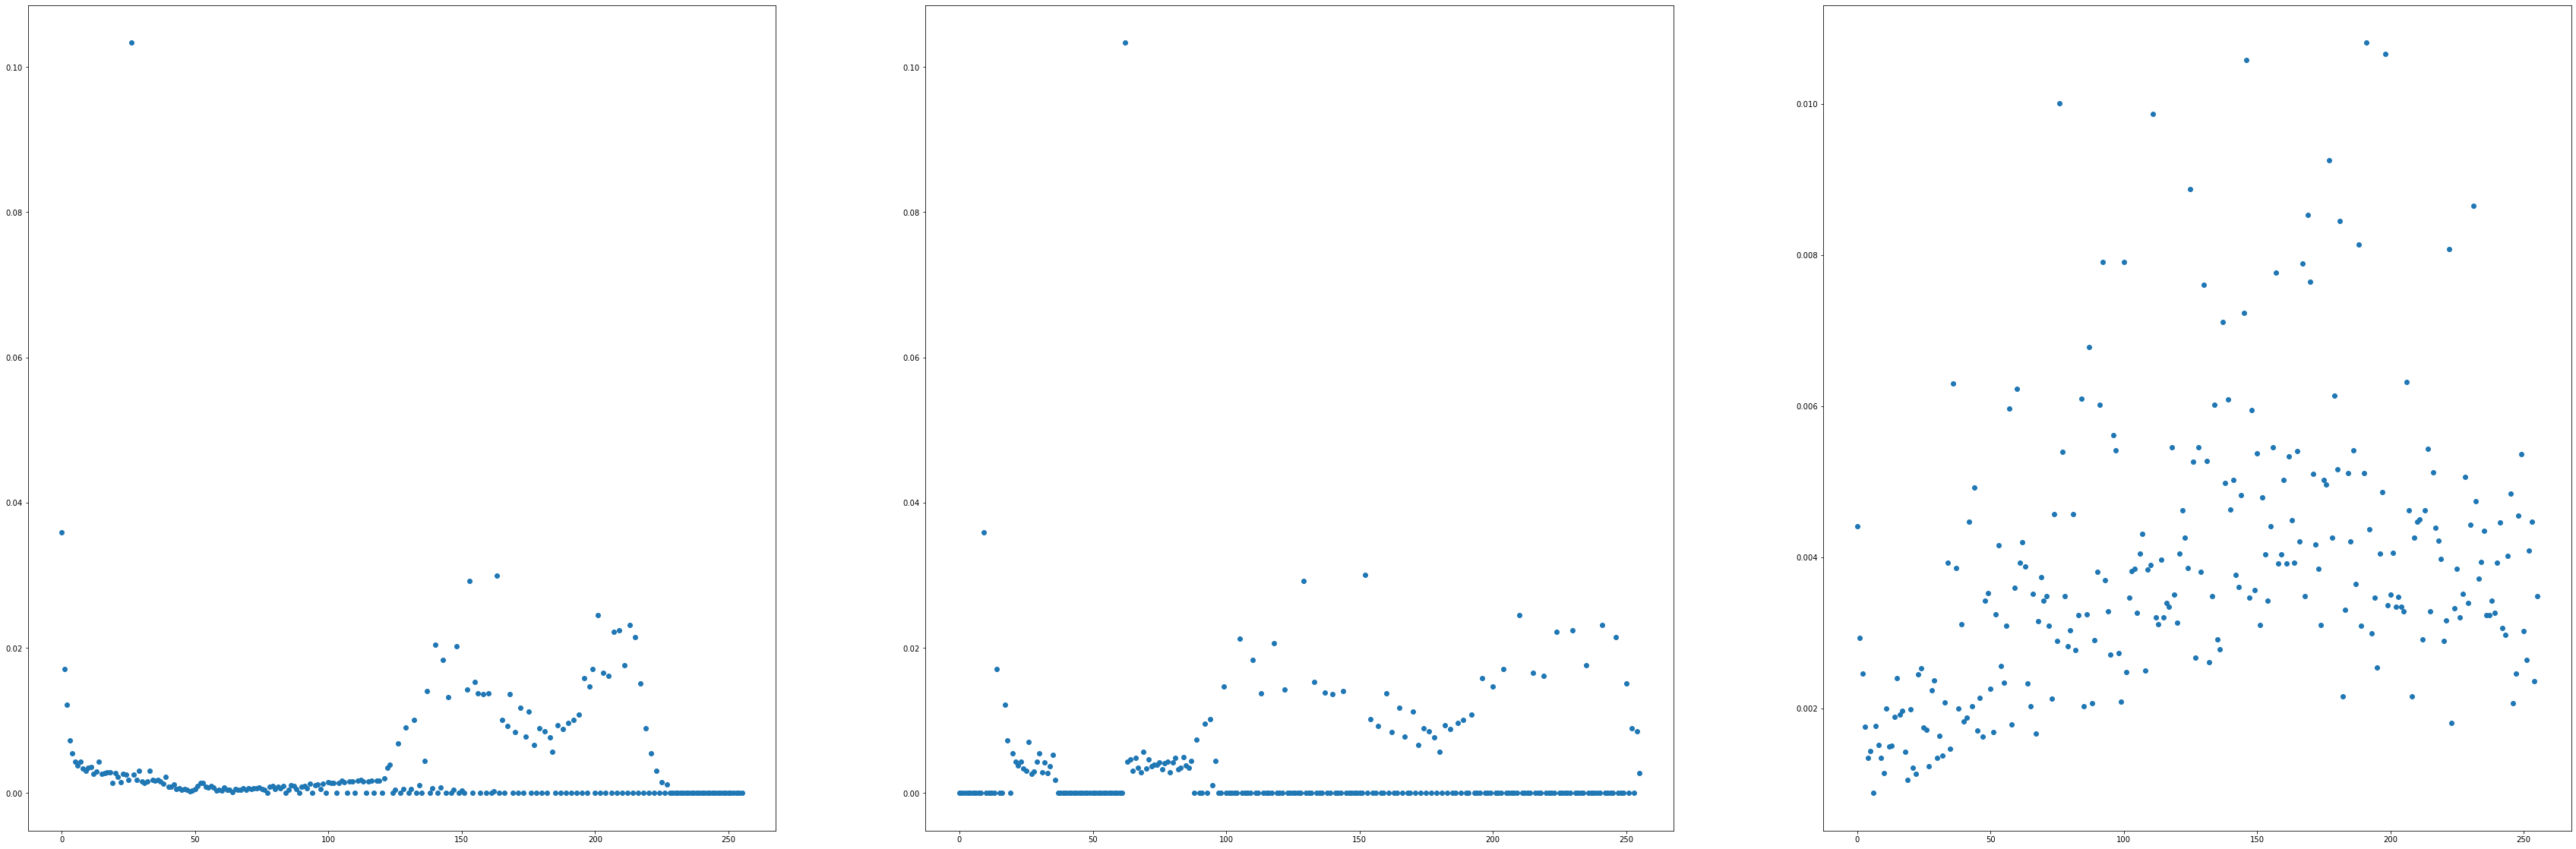

In [45]:
plt.figure(figsize=(60, 20))
plt.subplot(1, 3, 1)
plt.scatter(range(256), hist)
plt.subplot(1, 3, 2)
plt.scatter(range(256), build_hist(equal_img7))
plt.subplot(1, 3, 3)
plt.scatter(range(256), build_hist(adaptive_equal_img7))
plt.show()

In [5]:
def average_filter(img, kernel_size):
    height, width, channels = img.shape
    padding = int((kernel_size - 1) / 2)
    new_img = np.zeros((height, width, channels))
    pad_img = np.zeros((height + 2 * padding, width + 2 * padding, channels))
    pad_img[padding: padding + height, padding: padding + width, :] = img
    filter = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    for i in range(height):
        for j in range(width):
            for k in range(channels):
                new_img[i, j, k] = np.sum(filter * pad_img[i: i + kernel_size, j: j + kernel_size, k])
    return np.clip(np.round(new_img), 0, 255).astype('uint8')

In [16]:
img8 = cv2.imread('../img/Fig0333(a)(test_pattern_blurring_orig).tif')
average_img_3x3 = average_filter(img8, 3)
average_img_5x5 = average_filter(img8, 5)
average_img_9x9 = average_filter(img8, 9)

(502, 502, 3) float64
(504, 504, 3) float64
(508, 508, 3) float64


In [22]:
cv2.imshow("img8", img8)
cv2.imshow("average_img_3x3", average_img_3x3)
cv2.imshow("average_img_5x5", average_img_5x5)
cv2.imshow("average_img_9x9", average_img_9x9)
cv2.waitKey(0)
cv2.destroyAllWindows()  

In [18]:
def median_filter(img, kernel_size):
    height, width, channels = img.shape
    padding = int((kernel_size - 1) / 2)
    new_img = np.zeros((height, width, channels))
    pad_img = np.zeros((height + 2 * padding, width + 2 * padding, channels))
    pad_img[padding: padding + height, padding: padding + width, :] = img
    for i in range(height):
        for j in range(width):
            for k in range(channels):
                new_img[i, j, k] = np.median(pad_img[i: i + kernel_size, j: j + kernel_size, k])
    return np.clip(np.round(new_img), 0, 255).astype('uint8')

In [19]:
img9 = cv2.imread('../img/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif')
median_img_3x3 = median_filter(img9, 3)
median_img_5x5 = median_filter(img9, 5)
median_img_9x9 = median_filter(img9, 9)

(442, 457, 3) float64
(444, 459, 3) float64
(448, 463, 3) float64


In [21]:
cv2.imshow("img9", img9)
cv2.imshow("median_img_3x3", median_img_3x3)
cv2.imshow("median_img_5x5", median_img_5x5)
cv2.imshow("median_img_9x9", median_img_9x9)
cv2.waitKey(0)
cv2.destroyAllWindows()  

In [6]:
def Laplace_filter(img, type):
    height, width, channels = img.shape
    padding = 1
    new_img = img.copy().astype('float64')
    pad_img = np.zeros((height + 2 * padding, width + 2 * padding, channels))
    pad_img[padding: padding + height, padding: padding + width, :] = img
    if type == 1:
        filter = [[0, -1, 0], [-1, 4, -1], [0, -1, 0]]
    elif type == 2:
        filter = [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
    for i in range(height):
        for j in range(width):
            for k in range(channels):
                new_img[i, j, k] += np.sum(filter * pad_img[i: i + 3, j: j + 3, k])
    return np.clip(np.round(new_img), 0, 255).astype('uint8')
    

In [28]:
img10 = cv2.imread('../img/Fig0338(az)(blurry_moon).tif')
Laplace_img_90 = Laplace_filter(img10, 1)
Laplace_img_45 = Laplace_filter(img10, 2)

In [30]:
cv2.imshow("img10", img10)
cv2.imshow("Laplace_img_90", Laplace_img_90)
cv2.imshow("Laplace_img_45", Laplace_img_45)
cv2.waitKey(0)
cv2.destroyAllWindows()  

In [38]:
def unsharp_masking(img, k):
    blur_img = average_filter(img, 3)
    diff = img - blur_img
    new_img = img.copy().astype('float64')
    new_img += k * diff
    print(new_img.max())
    return img_norm(new_img)

In [49]:
img11 = cv2.imread('../img/Fig0340(a)(dipxe_text).tif')
um_img_1 = unsharp_masking(img11, 1)
um_img_2 = unsharp_masking(img11, 2)

453.0
452.0


In [50]:
cv2.imshow("img11", img11)
cv2.imshow("um_img_1", um_img_1)
cv2.imshow("um_img_2", um_img_2)
cv2.waitKey(0)
cv2.destroyAllWindows()  

In [7]:
def sobel_filter(img):
    height, width, channels = img.shape
    padding = 1
    new_img = np.zeros((height, width, channels))
    pad_img = np.zeros((height + 2 * padding, width + 2 * padding, channels))
    pad_img[padding: padding + height, padding: padding + width, :] = img
    filter_x = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
    filter_y = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    for i in range(height):
        for j in range(width):
            for k in range(channels):
                new_img[i, j, k] += np.fabs(np.sum(filter_x * pad_img[i: i + 3, j: j + 3, k]))
                new_img[i, j, k] += np.fabs(np.sum(filter_y * pad_img[i: i + 3, j: j + 3, k]))
    return img_norm(new_img)

In [77]:
img12 = cv2.imread('../img/Fig0342(a)(contact_lens_original).tif')
Sobel_img = sobel_filter(img12)

In [78]:
cv2.imshow("img12", img12)
cv2.imshow("Sobel_img", Sobel_img)
cv2.waitKey(0)
cv2.destroyAllWindows()  

In [19]:
img13 = cv2.imread('../img/Fig0343(a)(skeleton_orig).tif')
Laplace_img13 = Laplace_filter(img13, 1)
Sobel_img13 = sobel_filter(img13)
avg_Sobel_img13 = average_filter(Sobel_img13, 5)
mul_img13 = img_norm(avg_Sobel_img13.astype('float64') * Laplace_img13)
sharp_img13 = img_norm(img13.astype('float64') + mul_img13)
final_img13 = img_trans_gamma(sharp_img13, 1, 0.5)

In [20]:
cv2.imshow("img13", img13)
cv2.imshow("fianl_img13", final_img13)
cv2.waitKey(0)
cv2.destroyAllWindows()  